In [9]:
from mario_replays.load_data import load_replay_data
import os
import pandas as pd

sourcedata = '../../mario_learning.behavior/sourcedata/'

In [10]:
clips_df = load_replay_data(os.path.join(sourcedata, 'scene_clips'), type='metadata')
clips_variables = load_replay_data(os.path.join(sourcedata, 'scene_clips'), type='variables')

repetitions_df = load_replay_data(os.path.join(sourcedata, 'replays'), type='metadata')
repetitions_variables = load_replay_data(os.path.join(sourcedata, 'replays'), type='variables')


In [ ]:
from mario_scenes.load_data import load_background_images
from mario_scenes.load_data import load_scenes_info

level_backgrounds = load_background_images(level='level')
scene_backgrounds = load_background_images(level='scene')
scenes_info = load_scenes_info(format='df')

In [19]:
level_backgrounds['w1l1'].size

(3167, 224)

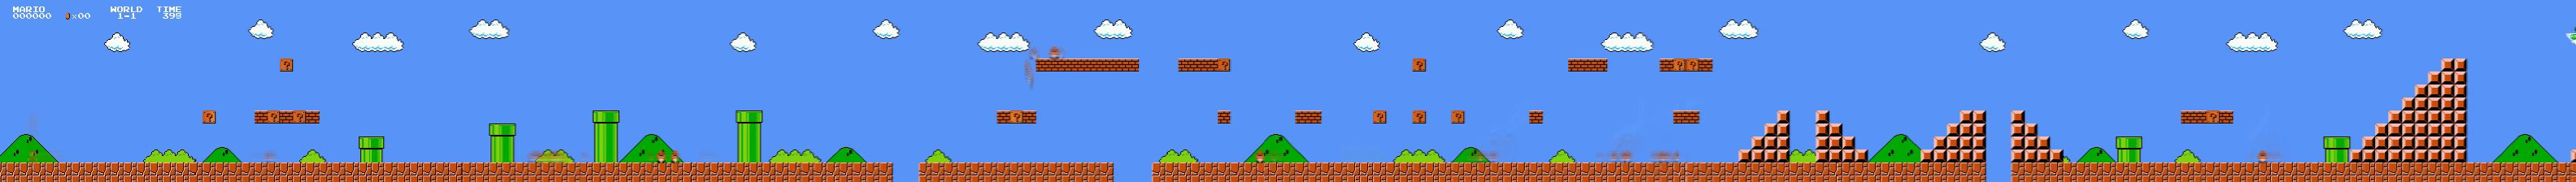

In [ ]:
level_backgrounds['w1l1']

In [ ]:
import numpy as np
from scipy.interpolate import interp1d



In [94]:

def get_traces(subject, level, variables_df, scene=None):
    subj_repvars = repetitions_variables[repetitions_variables['subject'] == subject]
    level_subj_repvars = subj_repvars[subj_repvars['level'] == level]

    x_list = []
    y_list = []
    order_list = []
    for idx, repvars in level_subj_repvars.iterrows():
        repvars['player_x_pos'] = [
            hi * 256 + lo for hi, lo in zip(repvars['player_x_posHi'], repvars['player_x_posLo'])
        ]
        #repvars['corrected_player_y_pos'] = 
        #np.asarray([float(d["player_y_pos"])+24-(1-d["player_y_screen_pos"])*256 for d in rep_data[1]])
        x_list.append(repvars['player_x_pos'])
        y_list.append([x+24 for x in repvars['player_y_pos']])
        #corrected_y = correct_player_y_positions(repvars['player_y_pos'], repvars['player_state'])
        #y_list.append(y_list)
        fname = repvars['filename'].split('/')[-1].split('.')[0]
        ses = fname.split('_')[1].split('-')[1]
        rep = fname.split('_')[-1].split('-')[1]
        order_list.append(int(f'{ses}{rep}'))
    return x_list, y_list, order_list

x_list, y_list, order_list = get_traces('01', 'w1l1', repetitions_variables)

In [95]:
len(y_kust)

NameError: name 'y_kust' is not defined

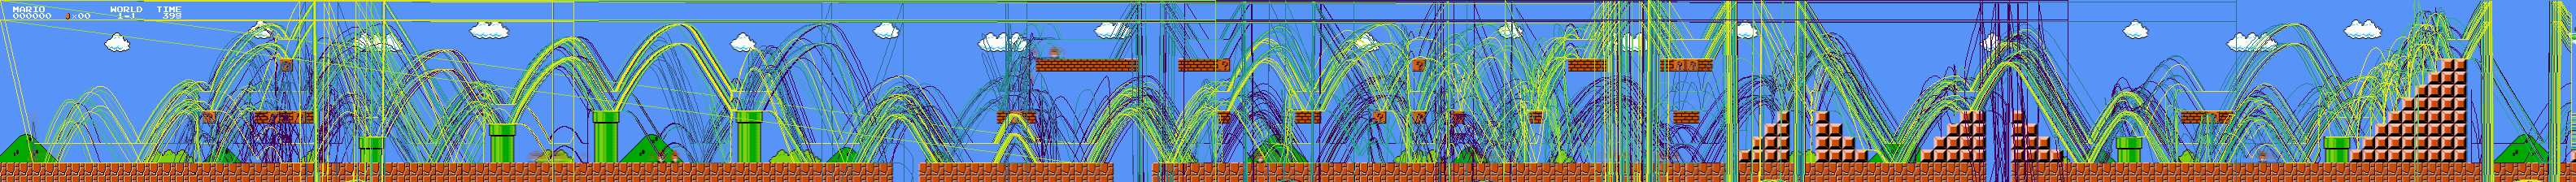

In [96]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def draw_traces_on_image(image, x_values_list, y_values_list, order_values, line_size=2):
    """
    Draws a set of traces on a Pillow image.

    Parameters:
    -----------
    image : PIL.Image
        The image on which to draw.

    x_values_list : list of lists
        A list containing N lists of x-values.

    y_values_list : list of lists
        A list containing N lists of y-values.

    order_values : list of floats
        A list of N order values used for colormap normalization.

    line_size : int
        Thickness of the lines to be drawn.

    Returns:
    --------
    PIL.Image
        The image with traces drawn on it.
    """
    assert len(x_values_list) == len(y_values_list) == len(order_values), "Mismatched input lengths."

    draw = ImageDraw.Draw(image)

    # Normalize order values for the colormap
    norm_orders = (np.array(order_values) - min(order_values)) / (max(order_values) - min(order_values) + 1e-8)
    colormap = plt.get_cmap('viridis')

    for x_vals, y_vals, norm_order in zip(x_values_list, y_values_list, norm_orders):
        color = tuple(int(c * 255) for c in colormap(norm_order)[:3])  # RGB tuple

        # Clip and draw the line segments
        points = list(zip(x_vals, y_vals))
        if len(points) < 2:
            continue
        for i in range(len(points) - 1):
            p1, p2 = points[i], points[i + 1]
            draw.line([p1, p2], fill=color, width=line_size)

    return image

draw_traces_on_image(level_backgrounds['w1l1'], x_list, y_list, order_list, line_size=1)

In [85]:
len(order_list)

37